### Analyse data extracted from StackExchange
In this project, I will extract data from StackExchange with data in year 2020. The data I extract includes:
<li>Id</li>
<li>PostTypeId</li>
<li>body</li>
<li>tags</li>
<li>creationdate</li>
<li>closedate</li>
<li>title</li>
<br>And I will use Pyspark to process 'wordcount' the main content in 'body' to see how many word created in 2020, and next, 'wordcount' the 'tags' to see how many tags were created in this year. And do some text analysis on the data set</br>

In [2]:
#Firstly, import pandas and numpy libraries to load data
import pandas as pd
import numpy as np

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/kienguyen/Documents/DATA SCIENCE/MSDS/07. MSDS680_Machine Learning/08. Week 8/data/QueryResults_2020.csv')
df

,Id,PostTypeId,body,tags,creationdate,closeddate,title
0,59680162,1,<p>I need to add bookmark to the new merged cr...,<python-3.x><pdf><bookmarks><pypdf>,2020-01-10 10:48:01,NaN,Adding bookmark to merged PDF's using pyPDF2
1,59680164,2,<p>The language above is JavaScript. I don't s...,NaN,2020-01-10 10:48:08,NaN,NaN
2,59680165,2,"<p>Yes, we could use</p>\n\n<pre><code>"""".join...",NaN,2020-01-10 10:48:10,NaN,NaN
3,59680166,2,<p>If I understand the version correctly: you ...,NaN,2020-01-10 10:48:22,NaN,NaN
4,59680167,1,"<p>Im playing with ""<code>kubectl get pods...<...",<bash><kubectl><minikube>,2020-01-10 10:48:23,NaN,kubectl: get cut pod name
...,...,...,...,...,...,...,...
49995,61043220,2,"<p>If I understood it correctly, what you need...",NaN,2020-04-05 13:16:20,NaN,NaN
49996,61043222,1,<p>Is there a way to add on the premade GraphQ...,<amazon-web-services><graphql><aws-amplify><aw...,2020-04-05 13:16:28,NaN,"AWS Amplify GraphQL API, how do I add onto the..."
49997,61043223,2,<p>Whenever the value of an <code>int</code> o...,NaN,2020-04-05 13:16:31,NaN,NaN
49998,61043224,2,"<p>With <code>if grep -q ""$sn"" ""$i""</code> you...",NaN,2020-04-05 13:16:33,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50000 non-null  int64 
 1   PostTypeId    50000 non-null  int64 
 2   body          49981 non-null  object
 3   tags          21833 non-null  object
 4   creationdate  50000 non-null  object
 5   closeddate    1131 non-null   object
 6   title         21833 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [4]:
for i in df.columns:
    print(i,df[i].isna().sum())

Id 0
PostTypeId 0
body 19
tags 28167
creationdate 0
closeddate 48869
title 28167


#### At this point, we can see that 'body' has 19 empty values, and 'tags' has 28,167 empty samples. I will remove these missing values before processing 'wordcount'

#### 'Wordcount' the main content in 'body:

In [4]:
df_body = df.dropna(subset = ['body'])
df_body_wordcount = df_body[['body']]

In [5]:
df_body_wordcount['body'].isna().sum())

body 0


In [10]:
# load pyspark
import findspark
findspark.init('/opt/spark')
import pyspark
sc = pyspark.SparkContext(appName="WordCount")


In [11]:
# Create text file:
body_stack_text= df_body_wordcount['body']
with open('body_stack_text.txt','w') as f:
    for text in body_stack_text:
        f.write(text + '\n')
f.close()

In [13]:
#convert to RDD file:
body_text_file = sc.textFile('/Users/kienguyen/Documents/DATA SCIENCE/MSDS/06. MSDS610_Data Engineering/08. Week 8/body_stack_text.txt')
from pyspark.rdd import RDD
isinstance(body_text_file, RDD)

True

In [14]:
body_text_file.take(5)

["<p>I need to add bookmark to the new merged created pdf. I use a script that merge all pdfs from the curent directory using pyPDF2. I will be good to have bookmark structured with the name of the each pdf's. Each PDF it may have 1-2-3 pages.</p>",
 '',
 "<p>Code that's working for merging all pdf's from directory:</p>",
 '',
 '<pre><code>#!/usr/bin/env python']

In [34]:
# remove html tag
import re
body_text_file = body_text_file.map(lambda line: re.sub('<[^<]+?>', '', line))
# remove some symbols: '{' ,'}', '=':
body_text_file = body_text_file.map(lambda x: x.replace('{',' ').replace('}',' ').replace('=',' '))
body_text_file.take(5)

["I need to add bookmark to the new merged created pdf. I use a script that merge all pdfs from the curent directory using pyPDF2. I will be good to have bookmark structured with the name of the each pdf's. Each PDF it may have 1-2-3 pages.",
 '',
 "Code that's working for merging all pdf's from directory:",
 '',
 '#!/usr/bin/env python']

In [35]:
# break into individual words
body_word_list = body_text_file.map(lambda x: x.lower().replace(',',' ').split()) 
body_word_list.take(5)

[['i',
  'need',
  'to',
  'add',
  'bookmark',
  'to',
  'the',
  'new',
  'merged',
  'created',
  'pdf.',
  'i',
  'use',
  'a',
  'script',
  'that',
  'merge',
  'all',
  'pdfs',
  'from',
  'the',
  'curent',
  'directory',
  'using',
  'pypdf2.',
  'i',
  'will',
  'be',
  'good',
  'to',
  'have',
  'bookmark',
  'structured',
  'with',
  'the',
  'name',
  'of',
  'the',
  'each',
  "pdf's.",
  'each',
  'pdf',
  'it',
  'may',
  'have',
  '1-2-3',
  'pages.'],
 [],
 ['code',
  "that's",
  'working',
  'for',
  'merging',
  'all',
  "pdf's",
  'from',
  'directory:'],
 [],
 ['#!/usr/bin/env', 'python']]

In [36]:
# Create nested list:
body_word_tuple = body_word_list.flatMap(lambda wordlist: [(word, 1) for word in wordlist])
body_word_tuple.take(5)

[('i', 1), ('need', 1), ('to', 1), ('add', 1), ('bookmark', 1)]

In [37]:
# Reduce step:
body_word_counts = body_word_tuple.reduceByKey(lambda total, count: total + count)
body_word_counts.take(5)

[('i', 109907),
 ('bookmark', 42),
 ('new', 19014),
 ('created', 2740),
 ('use', 20119)]

In [38]:
# count the words
body_word_counts.count()

742074

In [57]:
#save to file
body_word_counts.saveAsTextFile('body_wordcount.txt')

#### 'Wordcount' the 'tags':

In [44]:
#drop missing values:
df_tags = df.dropna(subset = ['tags'])
df_tags_wordcount = df_tags[['tags']]

In [45]:

# Checking nan values:
df_tags_wordcount['tags'].isna().sum()

0

In [46]:
# Create text file:
tags_stack_text= df_tags_wordcount['tags']
with open('tags_stack_text.txt','w') as f:
    for text in tags_stack_text:
        f.write(text + '\n')
f.close()

In [47]:
#convert to RDD file:
tags_text_file = sc.textFile('/Users/kienguyen/Documents/DATA SCIENCE/MSDS/06. MSDS610_Data Engineering/08. Week 8/tags_stack_text.txt')
from pyspark.rdd import RDD
isinstance(tags_text_file, RDD)

True

In [48]:
tags_text_file.take(5)

['<python-3.x><pdf><bookmarks><pypdf>',
 '<bash><kubectl><minikube>',
 '<python><serialization><amazon-ec2><devops><xgboost>',
 '<c++><visual-studio><qt><visual-c++><linker-errors>',
 '<powershell><output>']

We can see that there are a lot of symbol '<' and '>' used. I will replace these with space between words.

In [49]:
# remove '<' and '>' symbols:
tags_text_file = tags_text_file.map(lambda x: x.replace('<',' ').replace('>',' '))
tags_text_file.take(5)

[' python-3.x  pdf  bookmarks  pypdf ',
 ' bash  kubectl  minikube ',
 ' python  serialization  amazon-ec2  devops  xgboost ',
 ' c++  visual-studio  qt  visual-c++  linker-errors ',
 ' powershell  output ']

the file seems good now. Let's count how many tags

In [50]:
# break into individual words
tags_word_list = tags_text_file.map(lambda x: x.lower().replace(',',' ').split()) 

tags_word_list.take(5)

[['python-3.x', 'pdf', 'bookmarks', 'pypdf'],
 ['bash', 'kubectl', 'minikube'],
 ['python', 'serialization', 'amazon-ec2', 'devops', 'xgboost'],
 ['c++', 'visual-studio', 'qt', 'visual-c++', 'linker-errors'],
 ['powershell', 'output']]

In [51]:
# Create nested list:
tags_word_tuple = tags_word_list.flatMap(lambda wordlist: [(word, 1) for word in wordlist])
tags_word_tuple.take(5)

[('python-3.x', 1), ('pdf', 1), ('bookmarks', 1), ('pypdf', 1), ('bash', 1)]

In [52]:
# Reduce step:
tags_word_counts = tags_word_tuple.reduceByKey(lambda total, count: total + count)
tags_word_counts.take(5)

[('python-3.x', 799),
 ('pypdf', 2),
 ('python', 3203),
 ('serialization', 24),
 ('xgboost', 9)]

In [63]:
# count the words
tags_word_counts.count()


8736

In [ ]:
#save to file
tags_word_counts.saveAsTextFile('tags_wordcount.txt')

### WordCount Summary:
After running the 'wordcount', we now have the results:
* There are 764,825 words created in the main content of the posts.
* And there are 8,736 tags mentioned in those posts.

## Text Analysis on 'tags'

#### Check on top 10 most frequent tags

In [53]:
#find the 10 most frequently words:
top_10_tags = tags_word_counts.takeOrdered(10, key=lambda x: -x[1])
print(top_10_tags)

[('python', 3203), ('javascript', 2471), ('java', 1537), ('c#', 1027), ('html', 997), ('android', 976), ('reactjs', 926), ('php', 875), ('python-3.x', 799), ('c++', 795)]


#### Wordcloud

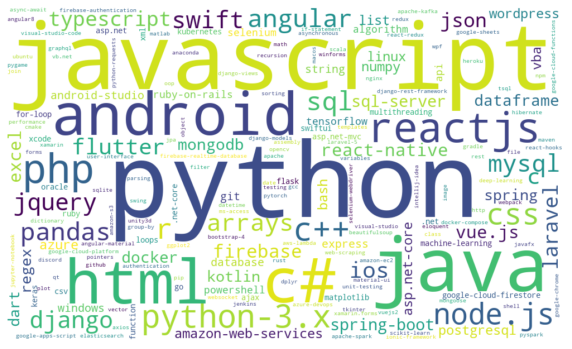

In [55]:
#Wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
tags_to_cloud = dict(tags_word_counts.collect())
wc = WordCloud(width=1000, height=600, max_words=200, colormap='viridis',background_color='white').generate_from_frequencies(tags_to_cloud)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Python seems to be mentioned the most, then javascript. We can see how popular these laguages are on the StackExchange forums.